In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import datetime as dt
import calendar
import time
from pandas.tseries.offsets import MonthEnd
from dateutil.relativedelta import relativedelta
import seaborn as sns
import dataframe_image as dfi

#Set notebook execution timer
a = time.time()

In [2]:
%matplotlib inline

In [3]:
#Load GJGNY dataset into a Dataframe
df = pd.read_csv("Resources/Green_Jobs_-_Green_New_York__GJGNY__Residential_Loan_Portfolio___Beginning_November_2010.csv")

In [4]:
#Format column headers to snake case and upper case
df.columns = df.columns.str.replace(' ', '_')
df.columns= df.columns.str.upper()

In [5]:
#Create function to get year delta (Accounts for leap years)
def subtract_years(dt, years):
    try:
        dt = dt.replace(year=dt.year-years)
    except ValueError:
        dt = dt.replace(year=dt.year-years, day=dt.day-1)
    return dt

In [6]:
#Make sure Setup date column is in datetime format
df['SETUP_DATE'] = pd.to_datetime(df['SETUP_DATE'])

# Create a column that holds each month
df['SETUP_MONTH'] = pd.to_datetime(df['SETUP_DATE'], format="%Y%m") + MonthEnd(1)

#Create a column that holds each year
df['SETUP_YEAR'] = df['SETUP_DATE'].dt.year


#Get working dates for graphs
date_list =[]
most_recent_date = df['SETUP_MONTH'].max() #Get the most recent date on the
three_years_prior_date = subtract_years(most_recent_date, 3) #Get the date of the past 3 years
three_years_prior_date_str= three_years_prior_date.strftime("%Y-%m")
assisted_date = pd.Timestamp('2016-09-30')

date_list.append(most_recent_date)
date_list.append(three_years_prior_date)
date_list.append(assisted_date)

# #Reformat working dates to only hold year and month
# most_recent_date=most_recent_date.strftime('%Y-%m')
# three_years_prior_date=three_years_prior_date.strftime('%Y-%m')
# assisted_date=assisted_date.strftime('%Y-%m')

#Verify timestamps
most_recent_date, three_years_prior_date, three_years_prior_date_str, assisted_date

(Timestamp('2021-12-31 00:00:00'),
 Timestamp('2018-12-31 00:00:00'),
 '2018-12',
 Timestamp('2016-09-30 00:00:00'))

In [7]:
#df.PURPOSE.unique()

In [8]:
#df.SETUP_YEAR.unique()

In [9]:
#df.UNDERWRITING.unique()

In [10]:
#df.UTILITY.unique()

In [11]:
#df.ACCOUNT_CODE.unique()

In [12]:
#df.CONTRACTOR_NAME.unique()

In [13]:
df.replace(to_replace="Halco", value='HOME ENERGY PERFORMANCE BY HALCO', inplace=True)

df['CONTRACTOR_NAME'] = df['CONTRACTOR_NAME'].str.upper()

## Plot exploratory trends

<AxesSubplot:>

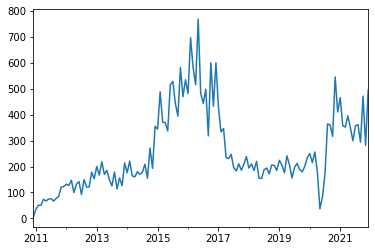

In [14]:
#Plot number of loans over time - Program to date
(df.loc[df['SETUP_DATE'].dt.year.between(2010, 2022), 'SETUP_DATE']
         .dt.to_period('M')
         .value_counts()
         .sort_index()
         .plot(kind="line")
)


<AxesSubplot:>

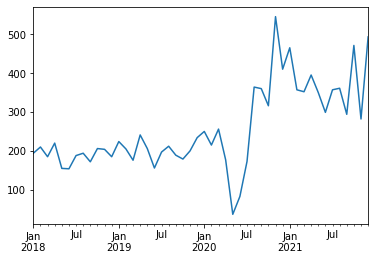

In [15]:
#Plot number of loans over the last 3 years
(df.loc[df['SETUP_DATE'].dt.year.between(2018, 2021), 'SETUP_DATE']
         .dt.to_period('M')
         .value_counts()
         .sort_index()
         .plot(kind="line")
)

In [16]:
#Create dataframes for each loan purpose
EE_loans_df = df[(df["PURPOSE"] == 'Energy Efficiency (EE)')]
PV_loans_df = df[(df["PURPOSE"] == 'Solar (PV)')]
ASHP_loans_df = df[(df["PURPOSE"] == 'Air Source Heat Pump (ASHP)')]
GSHP_loans_df = df[(df["PURPOSE"] == 'Ground Source Heat Pump (GSHP)')]
RHNY_loans_df = df[(df["PURPOSE"] == 'Renewable Heat NY (RHNY)')]
ST_loans_df = df[(df["PURPOSE"] == 'Solar Thermal')]


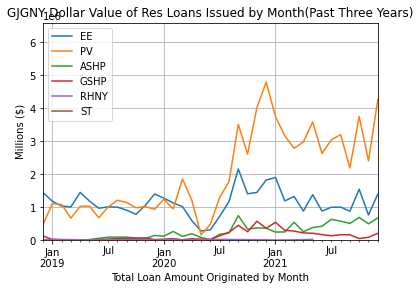

In [17]:
#create data by grouping on month and summing loan amounts
EE_loans_month = EE_loans_df.groupby(['SETUP_MONTH'])['ORIGINAL_LOAN_AMOUNT'].sum().reset_index(level=0)
PV_loans_month = PV_loans_df.groupby(['SETUP_MONTH'])['ORIGINAL_LOAN_AMOUNT'].sum().reset_index(level=0)
ASHP_loans_month = ASHP_loans_df.groupby(['SETUP_MONTH'])['ORIGINAL_LOAN_AMOUNT'].sum().reset_index(level=0)
GSHP_loans_month = GSHP_loans_df.groupby(['SETUP_MONTH'])['ORIGINAL_LOAN_AMOUNT'].sum().reset_index(level=0)
RHNY_loans_month = RHNY_loans_df.groupby(['SETUP_MONTH'])['ORIGINAL_LOAN_AMOUNT'].sum().reset_index(level=0)
ST_loans_month = ST_loans_df.groupby(['SETUP_MONTH'])['ORIGINAL_LOAN_AMOUNT'].sum().reset_index(level=0)

#Set figure Size and plot
ax = plt.gca()

#Plot dataframes for each purpose based on setup month and sum of Original loan amount
EE_loans_month.plot( x = 'SETUP_MONTH' , y = 'ORIGINAL_LOAN_AMOUNT', ax = ax )
PV_loans_month.plot( x = 'SETUP_MONTH' , y = 'ORIGINAL_LOAN_AMOUNT', ax = ax )
ASHP_loans_month.plot( x = 'SETUP_MONTH' , y = 'ORIGINAL_LOAN_AMOUNT', ax = ax )
GSHP_loans_month.plot( x = 'SETUP_MONTH' , y = 'ORIGINAL_LOAN_AMOUNT', ax = ax )
RHNY_loans_month.plot( x = 'SETUP_MONTH' , y = 'ORIGINAL_LOAN_AMOUNT', ax = ax )
ST_loans_month.plot( x = 'SETUP_MONTH' , y = 'ORIGINAL_LOAN_AMOUNT', ax = ax )

#Add legend
ax.legend(["EE", "PV","ASHP", "GSHP","RHNY", "ST"]);

#Label axes
ax.set_xlabel("Total Loan Amount Originated by Month")
ax.set_ylabel("Millions ($)")

#Set Axes limits
plt.gca().set_xlim(left=three_years_prior_date)
plt.gca().set_ylim(bottom=0)

#Add a title.
ax.set_title("GJGNY Dollar Value of Res Loans Issued by Month(Past Three Years)")

# Add a grid.
ax.grid()

#Save Graph
plt.savefig('Graphs_and_dataframes/GJGNY Dollar Value of Res Loans Issued by Month(Past Three Years).png')

In [18]:
#graph loan cancellations overtime $ amt (use account code date with a populated cancel reason cell)













## Create a combined  bar and line graph for loan purposes, loan amt and avg interest rate, respectively

In [19]:
#Create groupby year and purpose
df_gb_loan_amt = (df.groupby(['SETUP_YEAR','PURPOSE'])
         ['ORIGINAL_LOAN_AMOUNT'].sum()
         .reset_index())

#Create pivot table based on purpose
df_piv_loan_amt = (df_gb_loan_amt.pivot(index= 'SETUP_YEAR',
                     columns='PURPOSE',
                     values='ORIGINAL_LOAN_AMOUNT'))

#Remove all Nan values so that columns can be summed
df_piv_loan_amt = df_piv_loan_amt.fillna(0)

#Combine all solar purposes (Solar PV+Solar Thermal)
df_piv_loan_amt['All PV'] = df_piv_loan_amt["Solar (PV)"] + df_piv_loan_amt["Solar Thermal"]


#combine all 'other' purposes in one column (ASHP,GSHP,RHNY)
df_piv_loan_amt['Other'] = df_piv_loan_amt["Air Source Heat Pump (ASHP)"] + df_piv_loan_amt["Ground Source Heat Pump (GSHP)"] + df_piv_loan_amt["Renewable Heat NY (RHNY)"]


#drop unneccessary columns
df_piv_loan_amt.drop(["Solar (PV)",
             "Solar Thermal",
             "Air Source Heat Pump (ASHP)",
             "Ground Source Heat Pump (GSHP)",
             "Renewable Heat NY (RHNY)"],
            axis=1,
            inplace= True)


In [20]:
#Create dataframe holding average interest rate by year
df_gb_ir = (df.groupby(['SETUP_YEAR'])
         ['INTEREST_RATE'].mean()
         .reset_index())

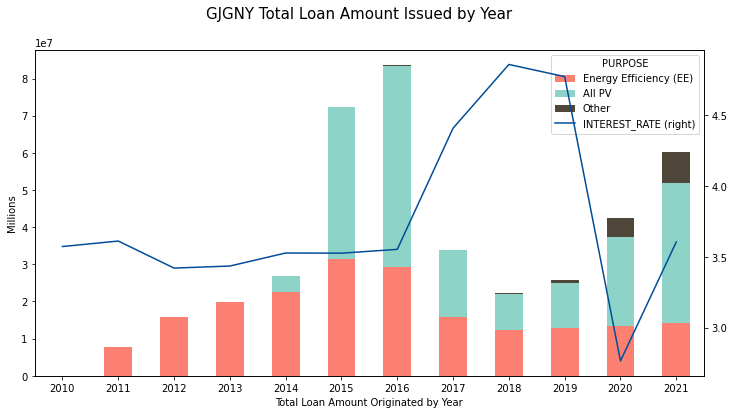

In [21]:
#Create subplot
fig, ax1= plt.subplots()

#add title
fig.suptitle("GJGNY Total Loan Amount Issued by Year", fontsize=15)

#Choose colors for purpose
colors ={'Energy Efficiency (EE)':'#fb8072',
        'All PV':'#8dd3c7',
        'Other':'#4f483a'}

#plot bars
df_piv_loan_amt.plot(ax=ax1,
            kind='bar', 
            stacked=True, 
            figsize=(12,6),
            color=colors,
            ylabel= "Millions",
            xlabel="Total Loan Amount Originated by Year")

#plot avg interest rate line
df_gb_ir.plot(y= 'INTEREST_RATE',
              ax=ax1,
              kind='line',
              sharex=True,
              secondary_y=True,
              color = '#004C99'
             )

#export graph image
fig.savefig('Graphs_and_dataframes/GJGNY Total Loan Amount Issued by Year.png')

## Create stacked graph for loan purposes (loan count)

In [22]:
#Remove successors from dataframe
df_suc_rem = df[df["SUCCESSOR_NUMBER"].str.contains("S-0|s-0", 
                                                 na=True, 
                                                 case= False
                                                )]

#Create groupby month and purpose
df_gb_loan_cnt = (df_suc_rem.groupby(['SETUP_MONTH','PURPOSE'])
         ['ORIGINAL_LOAN_AMOUNT'].count()
         .reset_index())

#Create pivot table for creating stacked bar chart
df_piv_loan_cnt = (df_gb_loan_cnt.pivot(index= 'SETUP_MONTH',
                     columns='PURPOSE',
                     values='ORIGINAL_LOAN_AMOUNT'))

#Remove all Nan values so that columns can be summed
df_piv_loan_cnt = df_piv_loan_cnt.fillna(0)

#Combine all solar purposes
df_piv_loan_cnt['All PV'] = df_piv_loan_cnt["Solar (PV)"] + df_piv_loan_cnt["Solar Thermal"]


#combine all 'other' purposes in one column
df_piv_loan_cnt['Other'] = df_piv_loan_cnt["Air Source Heat Pump (ASHP)"] + df_piv_loan_cnt["Ground Source Heat Pump (GSHP)"] + df_piv_loan_cnt["Renewable Heat NY (RHNY)"]


#drop unneccessary columns
df_piv_loan_cnt.drop(["Solar (PV)",
             "Solar Thermal",
             "Air Source Heat Pump (ASHP)",
             "Ground Source Heat Pump (GSHP)",
             "Renewable Heat NY (RHNY)"],
            axis=1,
            inplace= True)

#Trim dataframe to start on september 2016
df_piv_loan_cnt = df_piv_loan_cnt.loc['2016-09-01':]

#Reformat SETUP_MONTH to not hold last day of month
df_piv_loan_cnt = df_piv_loan_cnt.reset_index()
df_piv_loan_cnt['SETUP_MONTH'] = df_piv_loan_cnt['SETUP_MONTH'].apply(lambda x: x.strftime('%Y-%m'))
df_piv_loan_cnt.set_index('SETUP_MONTH', inplace=True)

df_piv_loan_cnt

PURPOSE,Energy Efficiency (EE),All PV,Other
SETUP_MONTH,,,
2016-09,163.0,149.0,0.0
2016-10,240.0,230.0,2.0
2016-11,259.0,281.0,1.0
2016-12,282.0,307.0,1.0
2017-01,213.0,206.0,1.0
...,...,...,...
2021-08,125.0,170.0,53.0
2021-09,112.0,119.0,47.0
2021-10,196.0,208.0,51.0


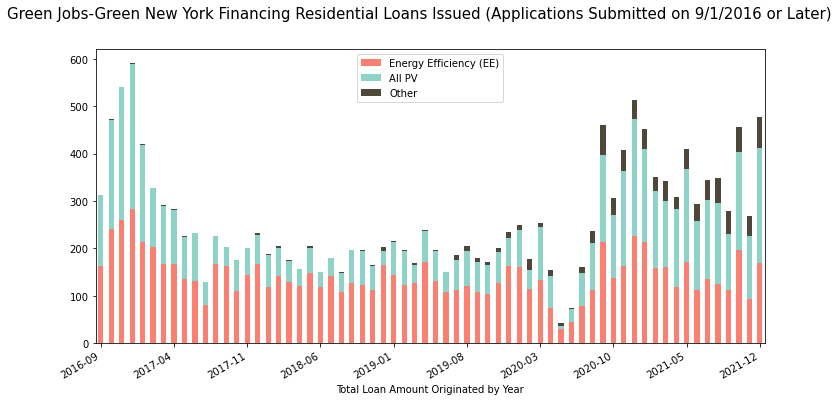

In [23]:
#Create subplot
fig2, ax2= plt.subplots()

#add title
fig2.suptitle("Green Jobs-Green New York Financing Residential Loans Issued (Applications Submitted on 9/1/2016 or Later)",
             fontsize=15)

#Choose colors for purpose
colors ={'Energy Efficiency (EE)':'#fb8072',
        'All PV':'#8dd3c7',
        'Other':'#4f483a'}

#plot bars
df_piv_loan_cnt.plot(ax=ax2,
                     kind='bar', 
                     stacked=True,
                     figsize=(12,6),
                     color=colors,
                     xlabel="Total Loan Amount Originated by Year"
                    ).legend(loc='best')

#Rotate date labels
fig2.autofmt_xdate()

# Make ticks on occurrences less frequent:
ax2.locator_params(axis='x', nbins=10)

#Save Graph
fig2.savefig('Graphs_and_dataframes/Total Loan Amount Originated by Year.png')

# Create quantitative graphs to view how Smart Energy Loans Compare to OBR (2 graphs, past 3 years and Program to Date)

## Create count dataframes

In [24]:
#Create groupby month and loan type
df_gb_loan_type = (df.groupby(['SETUP_MONTH','LOAN_TYPE'])
         ['ORIGINAL_LOAN_AMOUNT'].count()
         .reset_index())

#Create pivot table for creating stacked bar chart
df_piv_loan_type = (df_gb_loan_type.pivot(index= 'SETUP_MONTH',
                     columns='LOAN_TYPE',
                     values='ORIGINAL_LOAN_AMOUNT'))


#Reformat SETUP_MONTH to not hold last day of month
df_piv_loan_type = df_piv_loan_type.reset_index()
df_piv_loan_type['SETUP_MONTH'] = df_piv_loan_type['SETUP_MONTH'].apply(lambda x: x.strftime('%Y-%m'))
df_piv_loan_type.set_index('SETUP_MONTH', inplace=True)

#Trim dataframe to start on 3 years prior from the most recent date
df_piv_loan_type_cnt_L3Y = df_piv_loan_type.loc[three_years_prior_date_str:]

## Create Percent dataframes

In [25]:
#Create dataframe holding percentages for each type rate by year
df_piv_loan_type_pct = pd.crosstab(df.SETUP_MONTH, df.LOAN_TYPE, normalize='index')

#Reformat SETUP_MONTH to not hold last day of month
df_piv_loan_type_pct = df_piv_loan_type_pct.reset_index()
df_piv_loan_type_pct['SETUP_MONTH'] = df_piv_loan_type_pct['SETUP_MONTH'].apply(lambda x: x.strftime('%Y-%m'))
df_piv_loan_type_pct.set_index('SETUP_MONTH', inplace=True)

#Trim dataframe to start on 3 years prior from the most recent date
df_piv_loan_type_pct_L3Y = df_piv_loan_type_pct.loc[three_years_prior_date_str:]

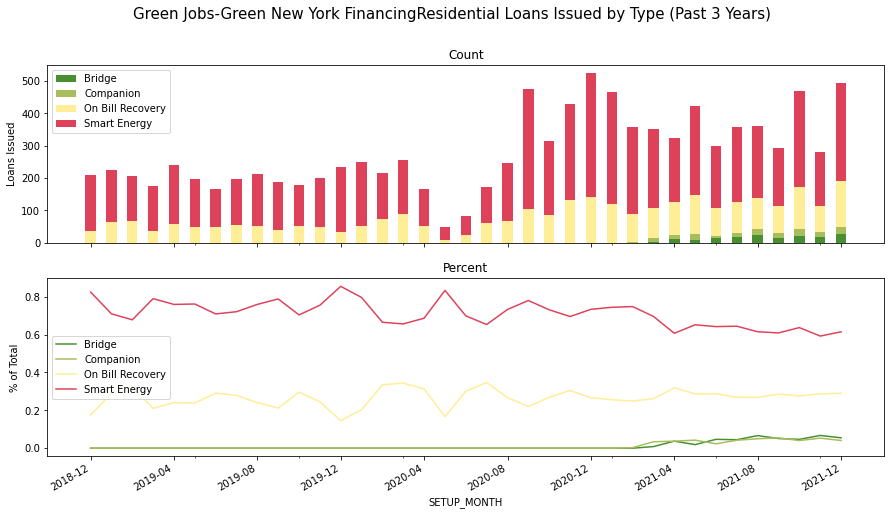

In [26]:
#Create subplot
fig3, (ax3,ax4) = plt.subplots(2,sharex=True)

#add title
fig3.suptitle("Green Jobs-Green New York FinancingResidential Loans Issued by Type (Past 3 Years)", fontsize=15)

#add subplot titles
ax3.set_title('Count')
ax4.set_title('Percent')

#Choose fig size
fig3.set_figheight(8)
fig3.set_figwidth(15)

#Choose colors for graphs
colors1 ={'Bridge':'#488f31',
         'Companion': '#a8bd5c',
         'On Bill Recovery':'#ffed97',
         'Smart Energy':'#de425b'
         }
#plot bars
df_piv_loan_type_cnt_L3Y.plot(ax=ax3,
                      kind='bar', 
                      stacked=True, 
                      color=colors1,
                      ylabel= "Loans Issued").legend(loc='best')
#plot lines
df_piv_loan_type_pct_L3Y.plot(ax=ax4,
                      kind='line',
                      color=colors1,
                      ylabel= "% of Total").legend(loc='best')

ax3.autoscale(enable=True, axis='both', tight=None)
ax4.autoscale(enable=True, axis='both', tight=None)

#Rotate date labels
fig3.autofmt_xdate()

# Make ticks on occurrences less frequent:
ax3.locator_params(axis='x', nbins=10)

#Save Graph
fig3.savefig('Graphs_and_dataframes/Green Jobs-Green New York FinancingResidential Loans Issued by Type (Past 3 Years).png')

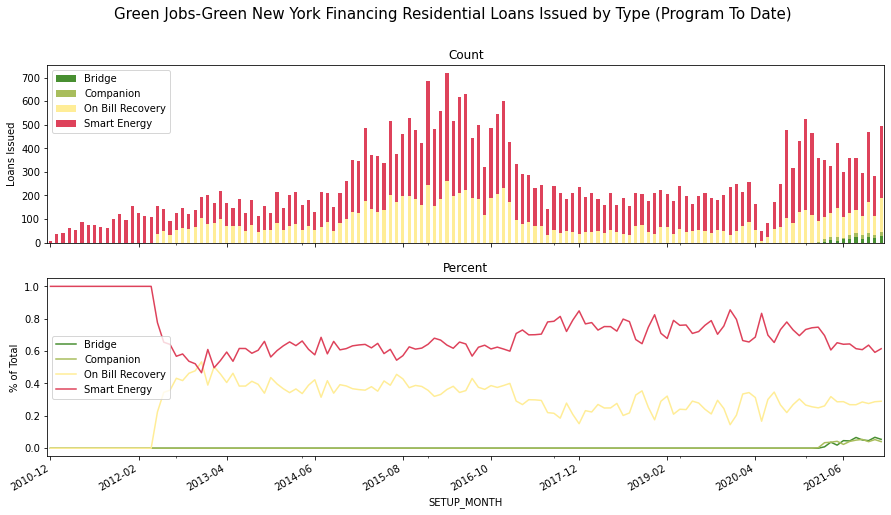

In [27]:
#Create subplot
fig4, (ax5,ax6) = plt.subplots(2,sharex=True)

#add title
fig4.suptitle("Green Jobs-Green New York Financing Residential Loans Issued by Type (Program To Date)", fontsize=15)

#add subplot titles
ax5.set_title('Count')
ax6.set_title('Percent')

#Choose fig size
fig4.set_figheight(8)
fig4.set_figwidth(15)


#Choose colors for graphs
colors1 ={'Bridge':'#488f31',
         'Companion': '#a8bd5c',
         'On Bill Recovery':'#ffed97',
         'Smart Energy':'#de425b'
         }


#plot bars
df_piv_loan_type.plot(ax=ax5,
                      kind='bar', 
                      stacked=True, 
                      color=colors1,
                      ylabel= "Loans Issued").legend(loc='best')
#plot lines
df_piv_loan_type_pct.plot(ax=ax6,
                      kind='line',
                      color=colors1,
                      ylabel= "% of Total").legend(loc='best')

#Autoscale axis
ax3.autoscale(enable=True, axis='both', tight=None)
ax4.autoscale(enable=True, axis='both', tight=None)

#Rotate date labels
fig4.autofmt_xdate()

# Make ticks on occurrences less frequent:
ax5.locator_params(axis='x', nbins=10)

#Save Graph
fig4.savefig('Graphs_and_dataframes/Green Jobs-Green New York Financing Residential Loans Issued by Type (Program To Date).png')

# Create quantitative and rate graphs to view how Underwriting compares (2 graphs, past 3 years and Program to Date)

In [28]:
#Create groupby month and underwriting
df_gb_Underwriting = (df.groupby(['SETUP_MONTH','UNDERWRITING'])
         ['ORIGINAL_LOAN_AMOUNT'].count()
         .reset_index())

#Create pivot table that will be used for creating stacked bar chart
df_piv_Underwriting = (df_gb_Underwriting.pivot(index= 'SETUP_MONTH',
                     columns='UNDERWRITING',
                     values='ORIGINAL_LOAN_AMOUNT'))


#Reformat SETUP_MONTH to not hold last day of month
df_piv_Underwriting = df_piv_Underwriting.reset_index()
df_piv_Underwriting['SETUP_MONTH'] = df_piv_Underwriting['SETUP_MONTH'].apply(lambda x: x.strftime('%Y-%m'))
df_piv_Underwriting.set_index('SETUP_MONTH', inplace=True)

#Trim dataframe to start on 3 years prior from the most recent date
df_piv_Underwriting_cnt_L3Y = df_piv_Underwriting.loc[three_years_prior_date_str:]

In [29]:
#Create dataframe holding percentages for each type rate by year
df_piv_Underwriting_pct = pd.crosstab(df.SETUP_MONTH, df.UNDERWRITING, normalize='index')

#Reformat SETUP_MONTH to not hold last day of month
df_piv_Underwriting_pct = df_piv_Underwriting_pct.reset_index()
df_piv_Underwriting_pct['SETUP_MONTH'] = df_piv_Underwriting_pct['SETUP_MONTH'].apply(lambda x: x.strftime('%Y-%m'))
df_piv_Underwriting_pct.set_index('SETUP_MONTH', inplace=True)

#Trim dataframe to start on 3 years prior from the most recent date
df_piv_Underwriting_pct_L3Y = df_piv_Underwriting_pct.loc[three_years_prior_date_str:]

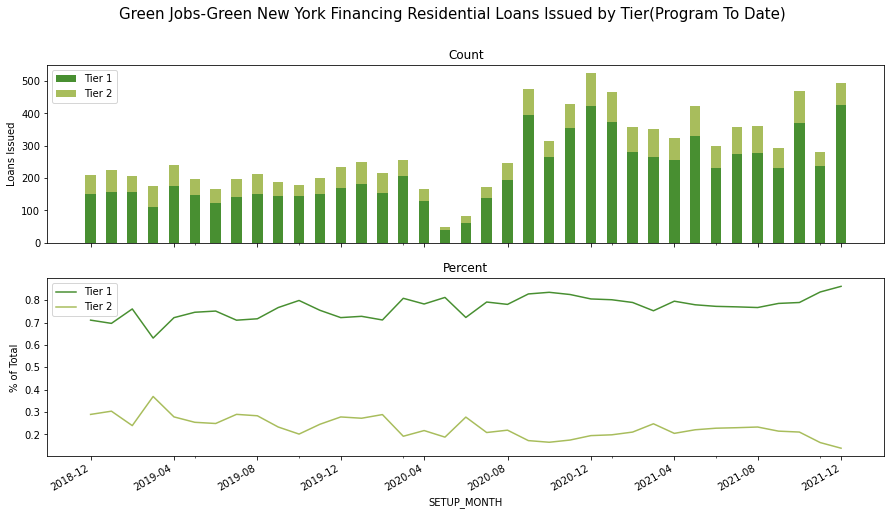

In [30]:
#Create subplot
fig5, (ax7,ax8) = plt.subplots(2,sharex=True)

#add title
fig5.suptitle("Green Jobs-Green New York Financing Residential Loans Issued by Tier(Program To Date)", fontsize=15)

#add subplot titles
ax7.set_title('Count')
ax8.set_title('Percent')

#Choose fig size
fig5.set_figheight(8)
fig5.set_figwidth(15)


#Choose colors for graphs
colors1 ={'Tier 1':'#488f31',
         'Tier 2': '#a8bd5c'
         }
#plot bars
df_piv_Underwriting_cnt_L3Y.plot(ax=ax7,
                      kind='bar', 
                      stacked=True, 
                      color=colors1,
                      ylabel= "Loans Issued").legend(loc='best')
#plot lines
df_piv_Underwriting_pct_L3Y.plot(ax=ax8,
                      kind='line',
                      color=colors1,
                      ylabel= "% of Total").legend(loc='best')

ax7.autoscale(enable=True, axis='both', tight=None)
ax8.autoscale(enable=True, axis='both', tight=None)


#Rotate date labels
fig5.autofmt_xdate()

# Make ticks on occurrences less frequent:
ax7.locator_params(axis='x', nbins=10)

#Export Graph
fig5.savefig('Graphs_and_dataframes/GJGNY Res Loans Issued by Tier(Past Three Years).png')

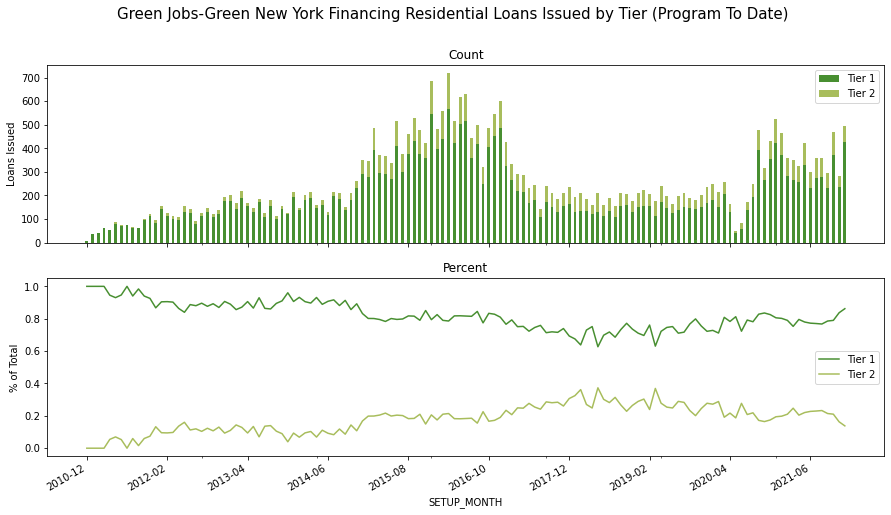

In [31]:
#Create subplot
fig6, (ax9,ax10) = plt.subplots(2,sharex=True)

#add title
fig6.suptitle("Green Jobs-Green New York Financing Residential Loans Issued by Tier (Program To Date)", fontsize=15)

#add subplot titles
ax9.set_title('Count')
ax10.set_title('Percent')

#Choose fig size
fig6.set_figheight(8)
fig6.set_figwidth(15)


#Choose colors for graphs
colors1 ={'Tier 1':'#488f31',
         'Tier 2': '#a8bd5c'
         }

#plot bars
df_piv_Underwriting.plot(ax=ax9,
                      kind='bar', 
                      stacked=True, 
                      color=colors1,
                      ylabel= "Loans Issued").legend(loc='best')
#plot lines
df_piv_Underwriting_pct.plot(ax=ax10,
                      kind='line',
                      color=colors1,
                      ylabel= "% of Total").legend(loc='best')

#Autoscale axis
ax9.autoscale(enable=True, axis='both', tight=None)
ax10.autoscale(enable=True, axis='both', tight=None)

#Rotate date labels
fig6.autofmt_xdate()

# Make ticks on occurrences less frequent:
ax9.locator_params(axis='x', nbins=10)

#Save Graph
fig6.savefig('Graphs_and_dataframes/GJGNY Res Loans Issued by Type (Program To Date).png')

## Create a dataframes showing a summary of all utility companies

In [32]:
#Create groupby Utility to get count (without Successors)
df_gb_UTILITY_cnt = (df_suc_rem.groupby(['UTILITY'])
         ['ORIGINAL_LOAN_AMOUNT'].count()
         .reset_index())

In [33]:
#Create groupby Utility to get sum of original loan amt (without Successors)
df_gb_UTILITY_orig_sum = (df_suc_rem.groupby(['UTILITY'])
         ['ORIGINAL_LOAN_AMOUNT'].sum()
         .reset_index())
df_gb_UTILITY_orig_sum.set_index('UTILITY', inplace=True)

#Create groupby Utility to get count of original loans (without Successors)
df_gb_UTILITY_cnt = (df_suc_rem.groupby(['UTILITY'])
         ['ORIGINAL_LOAN_AMOUNT'].count()
         .reset_index())
df_gb_UTILITY_cnt.set_index('UTILITY', inplace=True)

#Create groupby Utility to get outstanding loan amt (with Successors)
df_gb_UTILITY_remaining_sum = (df.groupby(['UTILITY'])
         ['CURRENT_BALANCE'].sum()
         .reset_index())
df_gb_UTILITY_remaining_sum.set_index('UTILITY', inplace=True)


#Merge all dfs based on utility and rename columns
df_utility = df_gb_UTILITY_cnt.merge(df_gb_UTILITY_orig_sum, left_index=True, right_index=True)
df_utility = df_utility.merge(df_gb_UTILITY_remaining_sum, left_index=True, right_index=True)

#rename columns
df_utility.rename(columns={'ORIGINAL_LOAN_AMOUNT_x':'ORIGINAL_LOAN_COUNT',
                           'ORIGINAL_LOAN_AMOUNT_y':'ORIGINAL_LOAN_AMOUNT',
                           'CURRENT_BALANCE':'REMAINING_BALANCE'}, inplace=True)

#Create Summary row for the dataframe and remove nan value
df_utility.loc['Total']= df_utility.sum(numeric_only=True, axis=0)
df_utility = df_utility.fillna(" ")

#Export df as png
df_styled3 = df_utility.style.background_gradient() #adding a gradient based on values in cell
dfi.export(df_styled3,"Graphs_and_dataframes/Utility_Summary.png")

df_utility



,ORIGINAL_LOAN_COUNT,ORIGINAL_LOAN_AMOUNT,REMAINING_BALANCE
UTILITY,,,
Central Hudson Gas and Electric,1524.0,2.092980e+07,1.207327e+07
Consolidated Edison,2513.0,3.927398e+07,2.410060e+07
Long Island Power Authority,10420.0,1.628427e+08,1.091253e+08
Municipal Utilities,221.0,1.865179e+06,9.874088e+05
NYS Electric and Gas,4895.0,5.029109e+07,2.831251e+07
National Grid,9068.0,8.580490e+07,4.725244e+07
Orange and Rockland Utilities,826.0,1.085294e+07,6.321173e+06
Rochester Gas and Electric,3940.0,3.167718e+07,1.934235e+07
Total,33407.0,4.035378e+08,2.475151e+08


## Create graph showing loan performance (Months since origination) vs charge off and delinquent amt (Does DTI and Credit Score have an impact?)

(array([14., 20., 47., 36., 30., 29., 42., 28., 27., 24., 23., 29., 25.,
        17., 10.,  9.,  7., 15., 12., 11.,  8.,  3.,  6., 11.,  2.,  6.,
        11.,  4.,  5.,  7.,  6.,  2.,  4.,  2.,  6.,  4.,  2.,  2.,  2.,
         3.,  1.,  5.,  2.,  0.,  2.,  0.,  0.,  2.,  2.,  0.]),
 array([    0.,   200.,   400.,   600.,   800.,  1000.,  1200.,  1400.,
         1600.,  1800.,  2000.,  2200.,  2400.,  2600.,  2800.,  3000.,
         3200.,  3400.,  3600.,  3800.,  4000.,  4200.,  4400.,  4600.,
         4800.,  5000.,  5200.,  5400.,  5600.,  5800.,  6000.,  6200.,
         6400.,  6600.,  6800.,  7000.,  7200.,  7400.,  7600.,  7800.,
         8000.,  8200.,  8400.,  8600.,  8800.,  9000.,  9200.,  9400.,
         9600.,  9800., 10000.]),
 <BarContainer object of 50 artists>)

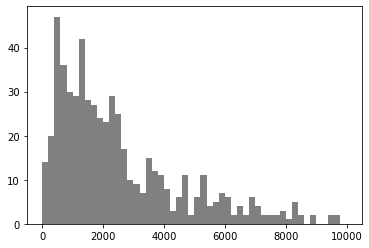

In [34]:
#Create a df with loans that are only in the legal category
df_LC = df[df.ACCOUNT_CODE == 'Legal Category']

#Look at Delinquency dollar amount distribution
plt.hist(df_LC['DELINQUENT_AMOUNT'], facecolor='gray', bins=50,range=[0, 10000], align='mid')

C:\Users\jlixa\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(array([ 6.,  2.,  8., 33., 62., 50., 60., 59., 51., 58., 33., 43., 24.,
        12., 19., 13., 12.,  5., 12.,  4.,  1.,  3.,  0.,  2.,  3.,  1.,
         1.,  0.,  0.,  1.]),
 array([ -4.        ,   0.43333333,   4.86666667,   9.3       ,
         13.73333333,  18.16666667,  22.6       ,  27.03333333,
         31.46666667,  35.9       ,  40.33333333,  44.76666667,
         49.2       ,  53.63333333,  58.06666667,  62.5       ,
         66.93333333,  71.36666667,  75.8       ,  80.23333333,
         84.66666667,  89.1       ,  93.53333333,  97.96666667,
        102.4       , 106.83333333, 111.26666667, 115.7       ,
        120.13333333, 124.56666667, 129.        ]),
 <BarContainer object of 30 artists>)

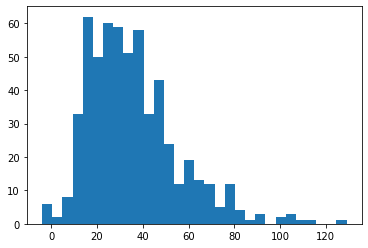

In [35]:
#Calculate number of Months delinquent
df_LC['MONTHS_DELINQUENT'] = df_LC['DAYS_DELINQUENT'].div(30).round(0)

#Look at Delinquency based on missed number of payments
plt.hist(df_LC['MONTHS_DELINQUENT'],bins=30)

C:\Users\jlixa\.conda\envs\PythonData\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
No handles with labels found to put in legend.


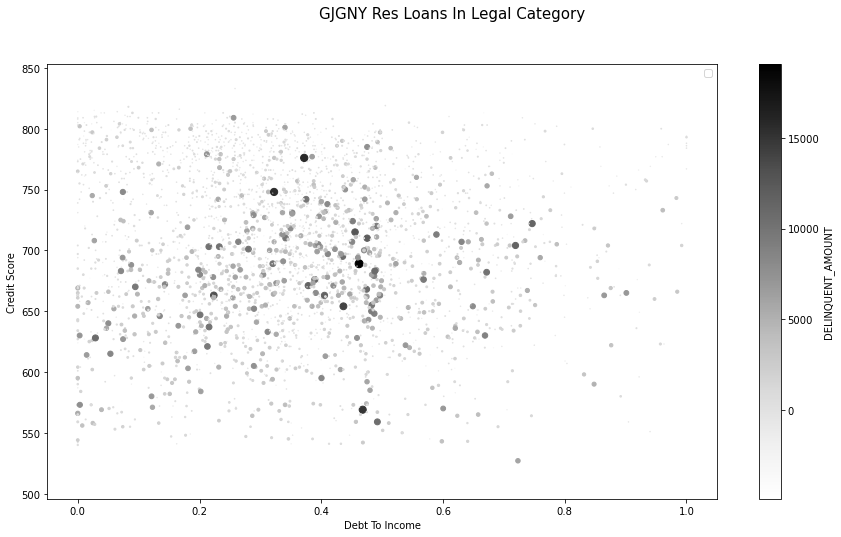

In [36]:
#Remove canceled loans due to death:
df_NCL = df[(df.CANCEL_REASON != 'DEATH')]

#Create subplot
fig7, ax11 = plt.subplots(figsize=(15, 8))

#add title
fig7.suptitle("GJGNY Res Loans In Legal Category", fontsize=15)

#plot scatter dots. 
df_NCL.plot(ax=ax11,
            x='DEBT_TO_INCOME',
            y='CREDIT_SCORE_CURRENT_HIGH',
            s=df_NCL.DELINQUENT_AMOUNT/300,   #sets marker size proportionate to delinquent amt
            c='DELINQUENT_AMOUNT',
            kind='scatter',
            ylabel= "Credit Score",
            xlabel= "Debt To Income").legend(loc='best')

#Scatter plot shows that the best borrowers are those with 700+ Credit Score and DTI below ~18%

#Save Graph
fig7.savefig('Graphs_and_dataframes/GJGNY Res Loans In Legal Category.png')

No handles with labels found to put in legend.


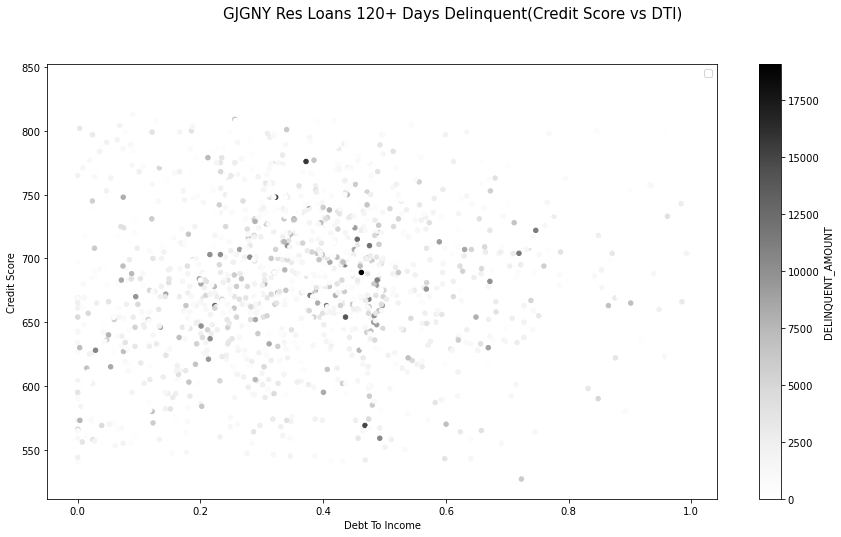

In [37]:
#Create a df with loans that are delinquent over 120 days
df_DD = (df[(df.DAYS_DELINQUENT > 120)  & (df.CANCEL_REASON != 'DEATH')])

#Create subplot
fig8, ax12 = plt.subplots(figsize=(15, 8))

#add title
fig8.suptitle("GJGNY Res Loans 120+ Days Delinquent(Credit Score vs DTI)", fontsize=15)

#Set red color for loans over 3000 delin


#plot scatter dots. 
df_DD.plot(ax=ax12,
        x='DEBT_TO_INCOME',
        y='CREDIT_SCORE_CURRENT_HIGH',
        c='DELINQUENT_AMOUNT',
        kind='scatter',  
        ylabel= "Credit Score",
        xlabel= "Debt To Income").legend(loc='best')

#Under .25 DTI and over 720 Credit score seems to be the best borrowers.

#Save Graph
fig8.savefig('Graphs_and_dataframes/GJGNY Res Loans 120+ Days Delinquent.png')

No handles with labels found to put in legend.


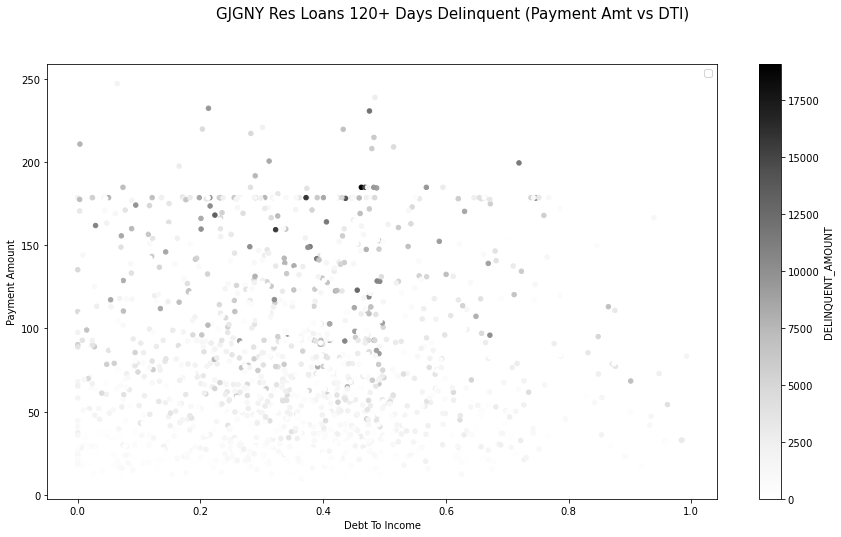

In [38]:
#DTI vs monthly payment amount delinquencies?
#Create subplot
fig12, ax16 = plt.subplots(figsize=(15, 8))

#add title
fig12.suptitle("GJGNY Res Loans 120+ Days Delinquent (Payment Amt vs DTI)", fontsize=15)



#plot scatter dots. 
df_DD.plot(ax=ax16,
        x='DEBT_TO_INCOME',
        y='PAYMENT_AMOUNT',
        c='DELINQUENT_AMOUNT',
        kind='scatter',  
        ylabel= "Payment Amount",
        xlabel= "Debt To Income").legend(loc='best')

#Save Graph
fig12.savefig('Graphs_and_dataframes/GJGNY Res Loans 120+ Days Delinquent (Payment Amt vs DTI).png')

C:\Users\jlixa\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\jlixa\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
No handles with labels found to put in legend.


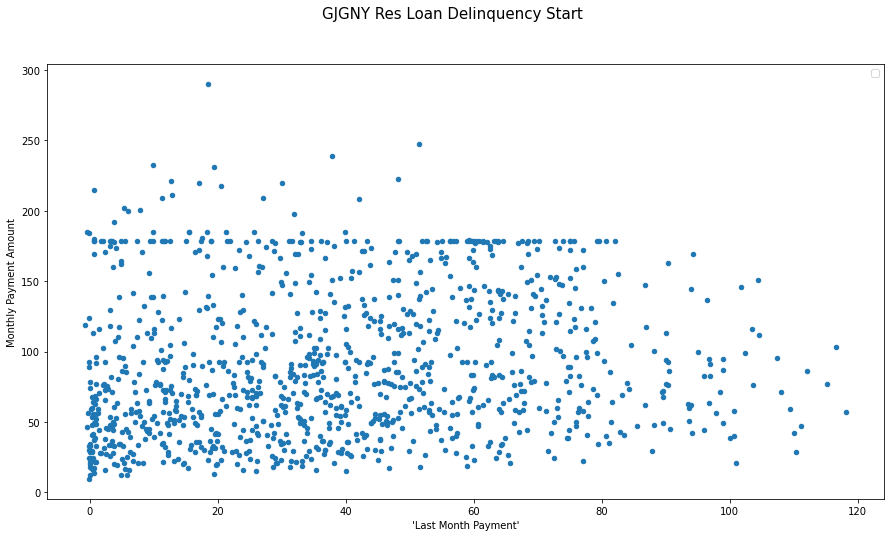

In [39]:
#Create a df with loans that are delinquent over $500 and are not canceled due to death.
df_DA = df[(df.DELINQUENT_AMOUNT > 500) & (df.CANCEL_REASON != 'DEATH')]

#subtract days delinquent from # of months since origination to pinpoint first missed payment.
df_DA['MONTHS_DELINQUENT'] = df_DA['DAYS_DELINQUENT'].div(30).round(0)
df_DA['LAST_MONTH_PAYMENT'] = df_DA['MONTHS_SINCE_ORIGINATION'] - df_DA['MONTHS_DELINQUENT']

#Create subplot
fig9, ax13 = plt.subplots(figsize=(15, 8))

#add title
fig9.suptitle("GJGNY Res Loan Delinquency Start", fontsize=15)

#plot scatter dots. 
df_DA.plot(ax=ax13,
        x='LAST_MONTH_PAYMENT',
        y='PAYMENT_AMOUNT',
#         c='DELINQUENT_AMOUNT',
        kind='scatter',  
        ylabel= "Monthly Payment Amount",
        xlabel= "'Last Month Payment'").legend(loc='best')


#Seems like loans are less likely to become delinquent after the 40th month and when payment is over $100.

#Save Graph
fig9.savefig('Graphs_and_dataframes/GJGNY Res Loans Delinquency Start.png')

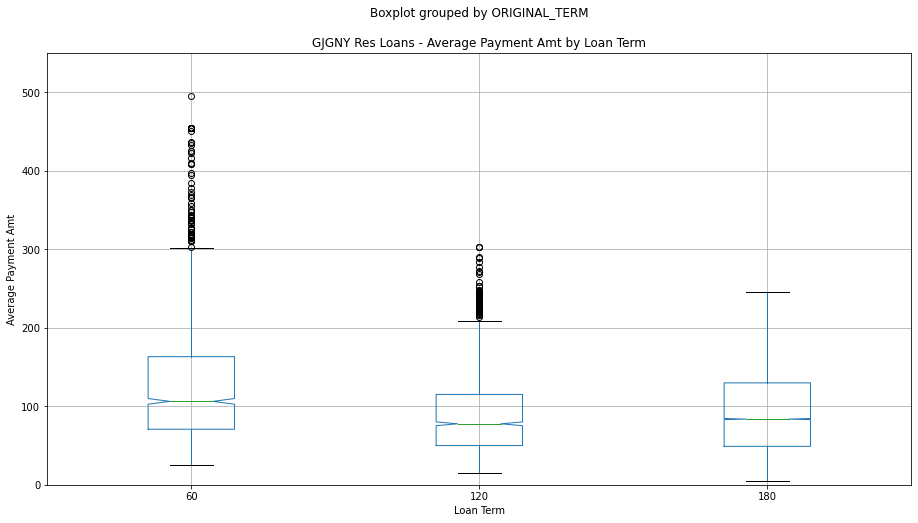

In [40]:
#boxplot of average monthly payment vs Loan term (successors removed)
options = [60,120,180]

#Filter companion or bridge loans out.
df_loan_term_bp = df_suc_rem[df_suc_rem.ORIGINAL_TERM.isin(options)]

#Create subplot
fig13, ax17 = plt.subplots(figsize=(15, 8))

# # #plot boxplot. 
df_loan_term_bp.boxplot(column='PAYMENT_AMOUNT', by='ORIGINAL_TERM', ax=ax17, vert=True, notch=True)

#Axis details
#ax17.set_yscale('log')
ax17.set_title('GJGNY Res Loans - Average Payment Amt by Loan Term')
ax17.set_ylim(0,550)
ax17.set_ylabel("Average Payment Amt")
ax17.set_xlabel("Loan Term")

#Save Graph
fig13.savefig('Graphs_and_dataframes/GJGNY Res Loans - Average Payment Amt by Loan Term.png')

## Create graph showing contractor performance. Top n contractors. Do certain contractors oversell service that may lead to loan defaults?

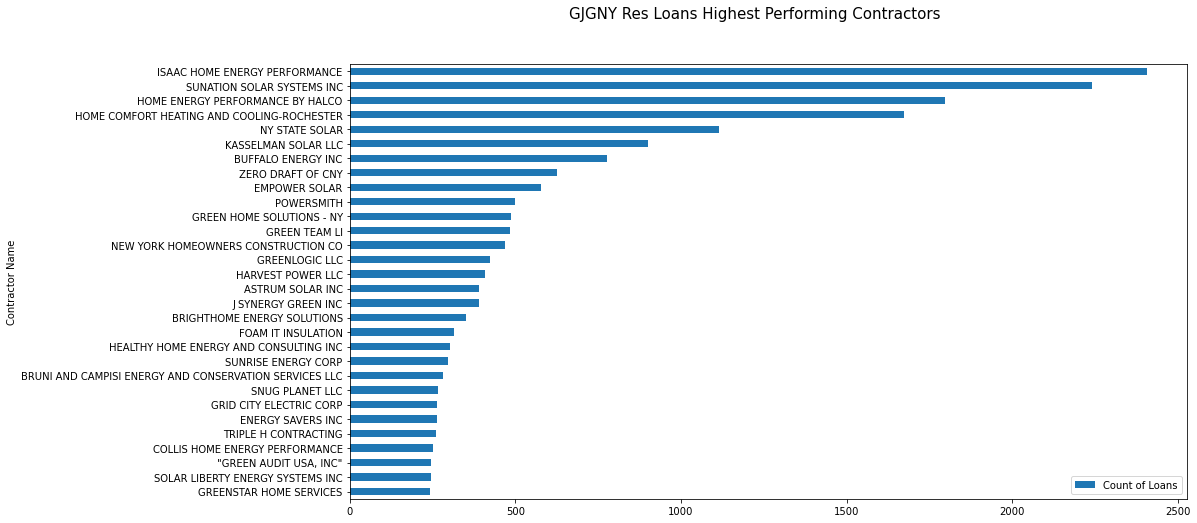

In [41]:
#Create groupby CONTRACTOR to get count (without Successors)
df_gb_CONTRACTOR_NAME_cnt = (df_suc_rem.groupby('CONTRACTOR_NAME')
         ['ORIGINAL_LOAN_AMOUNT'].count()
         .reset_index())

#Sort and filter top n contractors
n= 30 #choose no. of top contractors
df_gb_CONTRACTOR_NAME_cnt = df_gb_CONTRACTOR_NAME_cnt.sort_values(by='ORIGINAL_LOAN_AMOUNT', ascending=False).head(n)
top_contractors = pd.unique(df_gb_CONTRACTOR_NAME_cnt['CONTRACTOR_NAME'])
df_gb_CONTRACTOR_NAME_cnt.set_index('CONTRACTOR_NAME', inplace=True)


# #Create subplot
fig10, ax14 = plt.subplots(figsize=(15, 8))

#add title
fig10.suptitle("GJGNY Res Loans Highest Performing Contractors", fontsize=15)

#plot bar chart. 
df_gb_CONTRACTOR_NAME_cnt.plot(ax=ax14,
                               kind='barh',  
                               ylabel= "Count of Loans",
                               xlabel= "Contractor Name").legend(loc='best')

ax14.invert_yaxis() #create descending count of loans by contractor
ax14.legend(["Count of Loans"])


#Save Graph
fig10.savefig('Graphs_and_dataframes/GJGNY Res Loans Highest Performing Contractors.png')

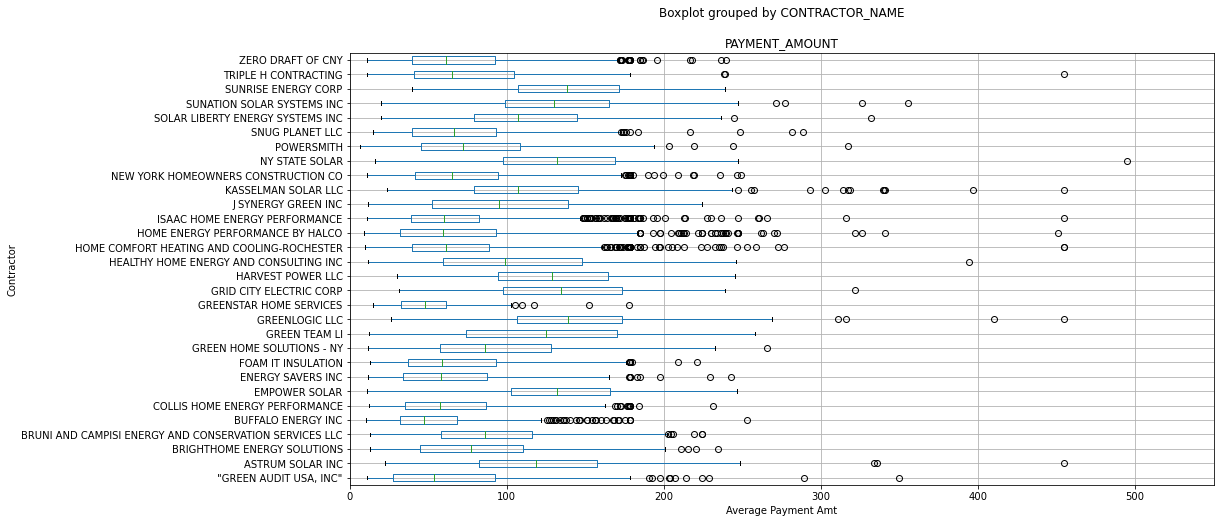

In [42]:
#Create groupby CONTRACTOR to get count (without Successors)
df_gb_CONTRACTOR_NAME_PA = df_suc_rem[['CONTRACTOR_NAME', 'PAYMENT_AMOUNT']]

# Filter to top contractors
df_gb_CONTRACTOR_NAME_PA = df_gb_CONTRACTOR_NAME_PA[df_gb_CONTRACTOR_NAME_PA['CONTRACTOR_NAME'].isin(top_contractors)]

#Create subplot
fig11, ax15 = plt.subplots(figsize=(15, 8))

# # #add title
fig11.suptitle("GJGNY Res Loans - Average Payment Amt by Contractor", fontsize=15)

# # #plot boxplot. 
df_gb_CONTRACTOR_NAME_PA.boxplot(column='PAYMENT_AMOUNT', by='CONTRACTOR_NAME', ax=ax15, vert=False)

#Axis details
# #ax15.set_yscale('log')
ax15.set_xlim(0,550)
ax15.set_xlabel("Average Payment Amt")
ax15.set_ylabel("Contractor")

#Save Graph
fig11.savefig('Graphs_and_dataframes/GJGNY Res Loans - Average Payment Amt by Contractor.png')

In [43]:
#Create dataframe with count of top n contractors with delinquent loans
df_DD_CONTRACTOR_defaults = (df_DD.groupby('CONTRACTOR_NAME')['DELINQUENT_AMOUNT'].count().reset_index())
df_DD_CONTRACTOR_defaults.sort_values(by='DELINQUENT_AMOUNT', ascending=False, inplace=True)
df_DD_CONTRACTOR_defaults.set_index('CONTRACTOR_NAME', inplace=True)
df_DD_CONTRACTOR_defaults.rename(columns={"DELINQUENT_AMOUNT": "DELINQUENT_COUNT"}, inplace=True)

#Create dataframe with count of top n contractors with delinquent loans
df_gb_CONTRACTOR_NAME_cnt.rename(columns={"ORIGINAL_LOAN_AMOUNT": "TOTAL_LOAN_COUNT"}, inplace=True)

#Merge both dfs based on contractor name
df_DD_CONTRACTOR_defaults = df_DD_CONTRACTOR_defaults.merge(df_gb_CONTRACTOR_NAME_cnt, left_index=True, right_index=True)

#calculate delinquency rate
df_DD_CONTRACTOR_defaults['DELINQUENCY_RATE'] = ((df_DD_CONTRACTOR_defaults.DELINQUENT_COUNT/df_DD_CONTRACTOR_defaults.TOTAL_LOAN_COUNT) * 100)
df_DD_CONTRACTOR_defaults.sort_values(by='DELINQUENCY_RATE', ascending=False, inplace=True)
df_DD_CONTRACTOR_defaults

#Export df as png
df_styled2 = df_DD_CONTRACTOR_defaults.style.background_gradient() #adding a gradient based on values in cell
dfi.export(df_styled2,"Graphs_and_dataframes/Loan Default Rate Grouped by Contractor.png")

## Create pivots based on pledge status. How many/much has not been pledged? Out of those that are unpledged, how many/much are bond worthy?

In [44]:
#Create dataframe with counts of pledge status
df_pledge_status = df.groupby('PLEDGED')['ORIGINAL_LOAN_AMOUNT'].count().reset_index()
df_pledge_status.rename(columns={"ORIGINAL_LOAN_AMOUNT": "LOAN_COUNT"}, inplace=True)
df_pledge_status

,PLEDGED,LOAN_COUNT
0,Series 2013A EE Bonds,3376
1,Series 2015A EE Bonds,5640
2,Series 2015A PV Bonds,4367
3,Series 2016A EE Bonds,3027
4,Series 2018A PV Bonds,1738
5,Series 2019A EE & PV Bonds,2319
6,Unpledged,5015


In [45]:
#create a dataframe with pivot of purpose for loans that are unpledged, NOT Canceled and not delinquent more than 120 days.
df_unpledged = df[(df.PLEDGED == 'Unpledged') & (df.ACCOUNT_CODE != 'Canceled') & (df.DAYS_DELINQUENT < 121)]
df_unpledged_piv1 = df_unpledged.groupby('PURPOSE')['ORIGINAL_LOAN_AMOUNT'].count().reset_index()
df_unpledged_piv2 = df_unpledged.groupby('PURPOSE')['CURRENT_BALANCE'].sum().reset_index()
df_unpledged_piv = df_unpledged_piv1.merge(df_unpledged_piv2, on='PURPOSE')
df_unpledged_piv.rename(columns={"ORIGINAL_LOAN_AMOUNT": "LOAN_COUNT",'CURRENT_BALANCE':'SUM_OF_CURRENT_BALANCE'}, inplace=True)
df_unpledged_piv

#Create Summary row for the dataframe and remove nan value
df_unpledged_piv.loc['Total']= df_unpledged_piv.sum(numeric_only=True, axis=0)
df_unpledged_piv = df_unpledged_piv.fillna(" ")

#Export df as png
df_styled = df_unpledged_piv.style.background_gradient() #adding a gradient based on values in cell
dfi.export(df_styled,"Graphs_and_dataframes/Unpledged_Loans_Summary.png")

df_unpledged_piv

,PURPOSE,LOAN_COUNT,SUM_OF_CURRENT_BALANCE
0,Air Source Heat Pump (ASHP),295.0,3997587.16
1,Energy Efficiency (EE),2052.0,9029892.71
2,Ground Source Heat Pump (GSHP),55.0,1032355.35
3,Renewable Heat NY (RHNY),71.0,341806.88
4,Solar (PV),1871.0,24562017.63
5,Solar Thermal,11.0,29631.84
Total,,4355.0,38993291.57


## Create a dataset for mapping purposes

In [46]:
#Remove unnecessary columns
df_mapping = df_suc_rem.drop(['REPORTING_PERIOD',
                              'CONTRACT_DATE',
                              'SETUP_DATE',
                              'ORIGINAL_TERM',
                              'ORIGINAL_MATURITY_DATE',
                              'CURRENT_MATURITY_DATE',
                              'CREDIT_SCORE',
                              'CREDIT_SCORE_NAME_2',
                              'FIRST_PAYMENT_DATE',
                              'LAST_PAYMENT_DATE',
                              'LAST_PAYMENT_AMOUNT',
                              'NEXT_PAYMENT_DUE_DATE',
                              'UNAPPLIED_CASH',
                              'TOTAL_INTEREST_PAID',
                              'TOTAL_LATE_CHARGE_PAID',
                              'SUCCESSOR_NUMBER',
                              'ACCOUNT_CODE_DATE',
                              'CANCEL_REASON',
                              'TYPE_OF_BANKRUPTCY'], axis=1)

In [47]:
#Remove unnecessary characters from GEOREFERENCE column
df_mapping['GEOREFERENCE'] = df_mapping['GEOREFERENCE'].str[7:]
df_mapping['GEOREFERENCE'] = df_mapping['GEOREFERENCE'].str.rstrip(')')

#Split GEOREFERENCE column into latitude and longitude based on ' ' delimiter
df_mapping[['LONGITUDE','LATITUDE']] = df_mapping['GEOREFERENCE'].str.split(' ', expand=True)
df_mapping.drop('GEOREFERENCE',axis=1, inplace=True)
df_mapping

,ORIGINAL_LOAN_AMOUNT,INTEREST_RATE,CREDIT_SCORE_CURRENT_HIGH,DEBT_TO_INCOME,PAYMENT_AMOUNT,CURRENT_BALANCE,DELINQUENT_AMOUNT,PAYMENTS_REMAINING,DAYS_DELINQUENT,PROPERTY_COUNTY,...,MONTHS_SINCE_ORIGINATION,PAYMENTS_MADE,PURPOSE,LOAN_TYPE,UNDERWRITING,PLEDGED,SETUP_MONTH,SETUP_YEAR,LONGITUDE,LATITUDE
0,7920.00,3.99,790.0,0.1466,145.82,0.00,0.00,0,-2,Erie,...,131.4,60.0,Energy Efficiency (EE),Smart Energy,Tier 1,Unpledged,2011-01-31,2011,-78.898159,42.948761
1,19169.60,3.99,754.0,0.2770,141.69,0.00,0.00,0,-28,Wayne,...,66.4,180.0,Solar (PV),Smart Energy,Tier 1,Series 2015A PV Bonds,2016-06-30,2016,-76.757158,43.096791
2,9892.69,3.49,722.0,0.2318,97.78,0.00,0.00,0,9,Erie,...,130.6,120.0,Energy Efficiency (EE),Smart Energy,Tier 1,Series 2013A EE Bonds,2011-02-28,2011,-78.83641,42.727748000000005
3,13000.00,3.49,754.0,0.2534,128.49,0.00,0.00,0,-11,Madison,...,124.5,120.0,Energy Efficiency (EE),Smart Energy,Tier 1,Series 2013A EE Bonds,2011-08-31,2011,-75.762715,43.082961
4,16554.00,6.99,687.0,0.3806,148.70,16127.14,0.00,172,-26,Saratoga,...,8.1,8.0,Solar (PV),Smart Energy,Tier 1,NaN,2021-05-31,2021,-73.783424,42.852843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34100,18379.94,6.99,750.0,0.6657,165.10,18379.94,0.00,180,-46,Nassau,...,2.7,0.0,Solar (PV),On Bill Recovery,Tier 2,Unpledged,2021-10-31,2021,-73.517198,40.725845
34101,4294.52,2.99,777.0,0.7610,41.45,0.00,0.00,0,-48,Suffolk,...,104.5,120.0,Energy Efficiency (EE),On Bill Recovery,Tier 2,Unpledged,2013-04-30,2013,-72.749509,40.93059
34102,18080.00,4.99,739.0,0.5098,142.88,0.00,0.00,0,-7,Suffolk,...,44.2,180.0,Solar (PV),On Bill Recovery,Tier 2,Unpledged,2018-05-31,2018,-73.072068,40.797268
34104,2570.00,6.49,731.0,0.7171,22.37,2483.15,0.00,170,-28,Nassau,...,10.1,10.0,Air Source Heat Pump (ASHP),Companion,Tier 2,NaN,2021-03-31,2021,-73.517198,40.725845


In [48]:
#Save df without successors into a csv to be used for mapping
df_mapping.to_csv("Transformed_datasets/GJGNY_Mapping_successors_removed.csv",index=True)

In [49]:
#Calculate total runtime of code
b= time.time()
c=b - a
print(f"This notebook took {c} seconds to execute")

This notebook took 11.17274284362793 seconds to execute
